<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones Generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de Datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [82]:
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carga de datos
data = fetch_olivetti_faces()
X = data.data
y = data.target

type(X), len(X), X.shape

(numpy.ndarray, 400, (400, 4096))

La carga de datos fue exitosa, con un total de 400 imagénes y cada imágen con 4096 características o píxeles.

### 2.  Análisis Preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [83]:
# Imprimir las dimensiones de los datos
print("Dimensión de la matriz de datos (X):", X.shape)
print("Número total de imágenes:", X.shape[0])
print("Número de características por imagen:", X.shape[1])

# Dimensión de las imágenes individuales
image_shape = (64, 64)
print("Dimensión de las imágenes:", image_shape)

# Mostrar los valores de los píxeles de la primera imagen
print("Valores de los píxeles de la primera imagen (escala de 0 a 1):")
print(X[0].reshape(image_shape))

Dimensión de la matriz de datos (X): (400, 4096)
Número total de imágenes: 400
Número de características por imagen: 4096
Dimensión de las imágenes: (64, 64)
Valores de los píxeles de la primera imagen (escala de 0 a 1):
[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


1. **Elementos de la base de datos:**  
Imágenes: la base de datos contiene un total de 400 imágenes de rostros.  
Sujetos: las imágenes corresponden a 40 sujetos diferentes, es decir, hay 10 imágenes por cada persona.  

3. **Dimensión de la base de datos:**  
400 filas: Cada fila representa una imagen de un rostro.  
4096 columnas: Cada columna representa un píxel de la imagen.  
Dimensión total: La matriz de datos tiene una forma de (400, 4096), lo que indica que hay 400 imágenes y cada imagen está representada por un vector de 4096 características.  

5. **Dimensión de las imágenes:**  
Tamaño de las imágenes: Cada imagen en la base de datos es de 64x64 píxeles en escala de grises.  
Píxeles: Dado que las imágenes son de 64x64 píxeles, esto resulta en un total de 4096 píxeles por imagen.  
Valores de los píxeles: Cada píxel tiene un valor de intensidad que varía entre 0 y 1, donde 0 representa el negro (ausencia de luz) y 1 representa el blanco (máxima intensidad de luz).  

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

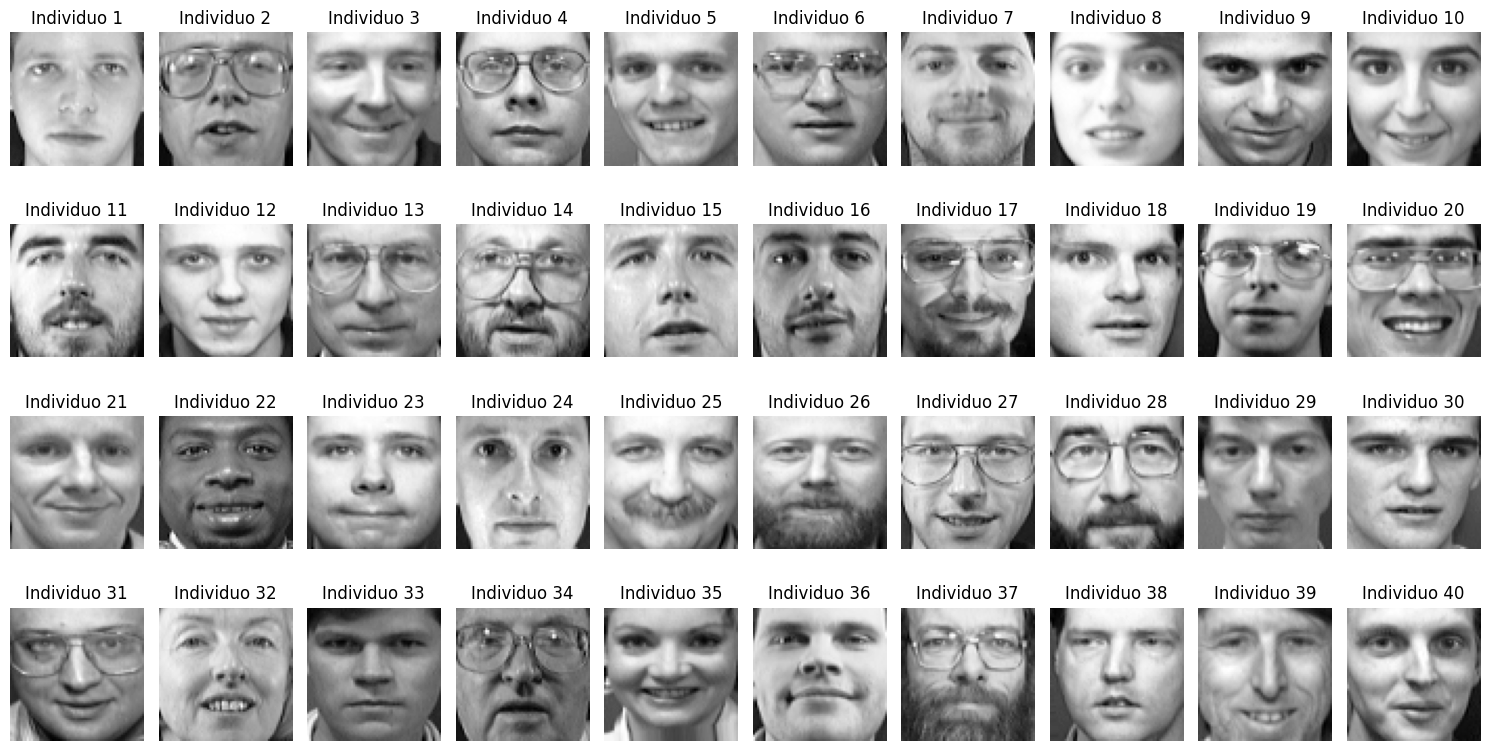

In [84]:
# Visualizar una imágen de cada uno de los individuos
fig, ax = plt.subplots(4, 10, figsize=(15, 8))

# Bucle sobre sobre los 40 individuos
for i in range(40):
    ax[i // 10, i % 10].imshow(X[y == i][0].reshape(64, 64), cmap='gray')
    ax[i // 10, i % 10].set_title(f'Individuo {i+1}')
    ax[i // 10, i % 10].axis('off')

# Ajustar espaciado
plt.tight_layout()
plt.show()

Las imágenes de cada sujeto presentan variaciones en términos de iluminación, expresiones faciales (por ejemplo, ojos abiertos/cerrados, sonriendo/sin sonreír) y detalles faciales (como el uso de gafas o no). Todas las imágenes fueron tomadas con el fondo homogéneo oscuro y los sujetos en una posición frontal.  

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [85]:
# Estandarizar los valores de los píxeles (media 0 y desviación estándar 1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# DataFrame con los valores estandarizados
df = pd.DataFrame(X_standardized, columns=[f'pixel_{i+1}' for i in range(X_standardized.shape[1])])

# Agregar etiquetas
df['label'] = y

# Primeras filas del dataFrame
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,pixel_4096,label
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663787,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.157252,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.293754,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.481785,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.134501,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0


Una vez que los valores de los píxeles han sido estandarizados (media 0 y desviación estándar 1), se organiza esta información en un DataFrame, que es una estructura de datos tabular proporcionada por la biblioteca pandas. En este DataFrame, cada fila representa una imagen de la base de datos, y cada columna corresponde a un píxel de la imagen. Las columnas se nombran secuencialmente, desde pixel_1 hasta pixel_4096, dado que cada imagen tiene 4096 píxeles (resultantes de la matriz de 64x64 píxeles).

Además, se añade una columna adicional al DataFrame llamada label, que contiene la etiqueta correspondiente a cada imagen. Esta etiqueta indica a qué persona pertenece la imagen, identificando a cada uno de los 40 individuos de la base de datos.

### 3. Clasificando de Forma no Supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [86]:
# Implementación de K-Means
kmeans = KMeans(n_clusters=40, random_state=123, n_init=10)
kmeans.fit(df.drop(columns=['label']))

# Obtener las etiquetas de los clusters
df['cluster'] = kmeans.labels_

# Resultados
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,pixel_4096,label,cluster
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0,7
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0,14
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0,7
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0,5
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0,14


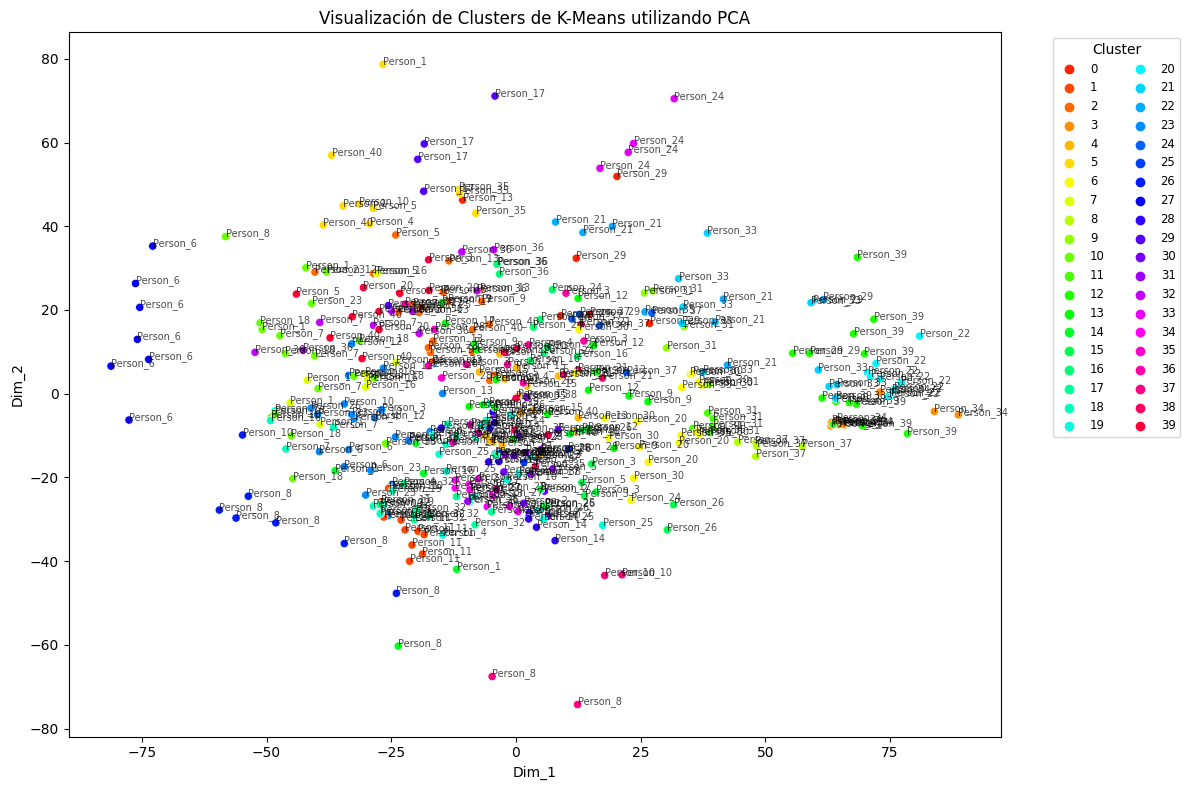

In [25]:
# Reducir la dimensionalidad de los datos estandarizados a 2D para la visualización
pca = PCA(n_components=2, random_state=123)
X_pca = pca.fit_transform(df.drop(columns=['label', 'cluster']))

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(X_pca, columns=['Dim_1', 'Dim_2'])
df_pca['cluster'] = df['cluster']
df_pca['label'] = df['label'].map(dict(enumerate(names)))

# Crear visualización
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", 40)

# Dibujar el gráfico de dispersión
sns.scatterplot(x='Dim_1', y='Dim_2', hue='cluster', palette=palette, data=df_pca, legend='full')

# Añadir etiquetas
for i in range(df_pca.shape[0]):
    plt.text(df_pca['Dim_1'][i], df_pca['Dim_2'][i], df_pca['label'][i], 
             fontsize=7, alpha=0.7)

# Ajustar leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')

plt.title('Visualización de Clusters de K-Means utilizando PCA')
plt.tight_layout()
plt.show()

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

In [87]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score

# Calcular NMI (Normalized_Mutual_Info_score) y AMI (Adjusted_Mutual_Info_score)
nmi_score = normalized_mutual_info_score(df['label'], df['cluster'])
ami_score = adjusted_mutual_info_score(df['label'], df['cluster'])

# Calcular el SSE (inercia: la suma de las distancias cuadradas de cada punto de datos al centroide de su cluster asignado)
sse = kmeans.inertia_

# Resultados de calidad de la clasificación
print(f"Normalized Mutual Information (NMI): {nmi_score:.2f}")
print(f"Adjusted Mutual Information (AMI): {ami_score:.2f}")
print(f"Suma de los Errores Cuadrados (SSE): {sse:.2f}")

Normalized Mutual Information (NMI): 0.78
Adjusted Mutual Information (AMI): 0.64
Suma de los Errores Cuadrados (SSE): 610190.12


El índice de información mutua normalizada (NMI) de 0.78 indica que el algoritmo ha capturado gran parte de la estructura inherente de los datos, logrando una buena correspondencia entre los clusters y las etiquetas verdaderas de los individuos. Sin embargo, el índice de información mutua ajustado (AMI), con un valor de 0.64, revela que, aunque hay una correspondencia significativa, el rendimiento de K-means no es perfecto cuando se ajusta por las coincidencias debidas al azar. Este valor sugiere que, si bien el clustering logrado es útil, todavía hay margen para mejoras.  

El SSE mide la compacidad interna de los clusters y no la separación entre clusters. Un SSE más bajo sugiere que los puntos de datos están más cerca de los centroides de sus respectivos clusters, lo que indica que los clusters son más compactos. En este caso, un valor de 610190.12 es un valor absoluto que indica el grado de dispersión interna de los clusters.  

In [99]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Función para identificar la imagen más frecuente por clúster
def imagen_por_cluster(df):
    # Contar la frecuencia de cada imagen dentro de cada clúster
    cluster_counts = df.groupby(['cluster', 'label']).size().reset_index(name='count')
    
    # Encontrar la imagen más frecuente en cada clúster
    most_frequent_images = cluster_counts.loc[cluster_counts.groupby('cluster')['count'].idxmax()]
    
    # Crear un diccionario de mapeo para las imágenes más frecuentes
    image_most_frequent_dict = most_frequent_images.set_index('cluster')['label'].to_dict()
    
    # Agregar una nueva columna al DataFrame original con el ID de la imagen más frecuente
    df = df.copy()  # Evitar modificaciones directas en el DataFrame original
    df['imagen_mas_frecuente_cluster'] = df['cluster'].map(image_most_frequent_dict)
    return df

# Función para calcular la precisión general del modelo
def desempeño_modelo(df):
    accuracy = accuracy_score(df['label'], df['imagen_mas_frecuente_cluster'])
    print(f"El accuracy del modelo es de {accuracy:.4f}")

# Aplicar la función al DataFrame
df = imagen_por_cluster(df)
desempeño_modelo(df)

# Calcular la precisión en cada clúster
total_images_per_cluster = df['cluster'].value_counts().reset_index()
total_images_per_cluster.columns = ['cluster', 'total_images']

# Contar cuántas imágenes en cada clúster coinciden con la imagen más frecuente
correct_predictions_per_cluster = df[df['label'] == df['imagen_mas_frecuente_cluster']]\
                                    .groupby('cluster').size().reset_index(name='correct_predictions')

# Unir los DataFrames de total de imágenes y correctas para calcular precisión
cluster_accuracy = pd.merge(total_images_per_cluster, correct_predictions_per_cluster, on='cluster', how='left')
cluster_accuracy['correct_predictions'] = cluster_accuracy['correct_predictions'].fillna(0)
cluster_accuracy['precision'] = (cluster_accuracy['correct_predictions'] / cluster_accuracy['total_images']) * 100

# Seleccionar y reordenar las columnas para el resultado final
result_df = cluster_accuracy[['cluster', 'correct_predictions', 'precision']]

# Renombrar la columna 'correct_predictions' a 'imagen_mas_frecuente_cluster'
result_df = result_df.rename(columns={'correct_predictions': 'imagen_mas_frecuente_cluster'})


result_df.head(40)


El accuracy del modelo es de 0.6625


,cluster,imagen_mas_frecuente_cluster,precision
0,23,4,17.391304
1,2,6,28.571429
2,10,9,50.000000
3,6,10,55.555556
4,13,7,38.888889
5,4,10,62.500000
6,19,9,60.000000
7,18,10,66.666667
8,12,10,76.923077
9,15,5,41.666667


Adicionalmente analizamos la capacidad del algoritmo de agrupar en cada cluster imagenes del mismo individuo. Podemos evidenciar que hay clusters que tienen una capacidad de agrupar el 100% de las imagenes correctamente, es decir que las imagenes que se asignaron a ese cluster son todas del mismo individuo, como por ejemplo el cluster 21. Sin embargo hay clusters cuyo desempeño no es tan bueno, como por ejemplo el cluster 23, que tenia una precision de 17%, y cuya imagen mas frecuente era la numero 4.
El accuracy general es de 66%.

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

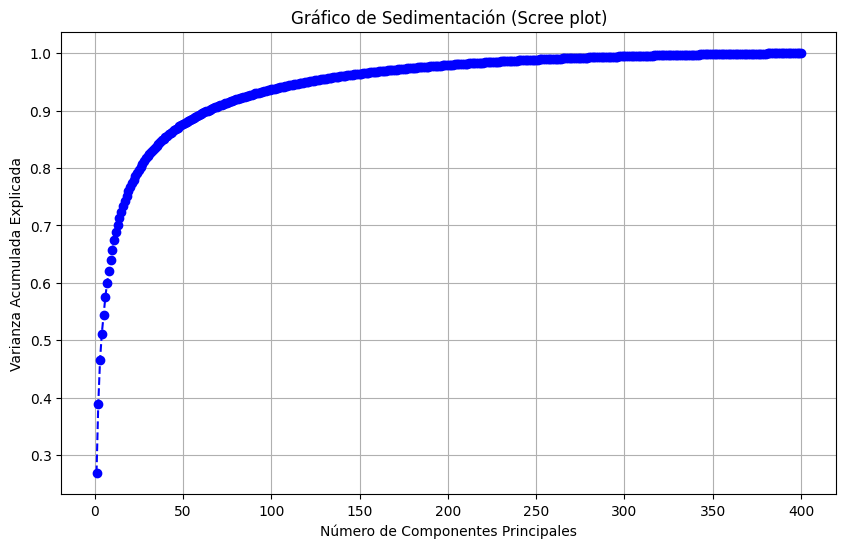

In [91]:
# Calculo PCA y grafica de varianza acumulada  explicada
pca = PCA(random_state=123)
X_pca = pca.fit_transform(df.drop(columns=['label', 'cluster']))

explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

# Crear el gráfico de sedimentación
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumsum, marker='o', linestyle='--', color='b')
plt.title('Gráfico de Sedimentación (Scree plot)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()


In [97]:
pca = PCA(n_components=0.95, random_state=123)
X_pca = pca.fit_transform(df.drop(columns=['label', 'cluster']))
print("Cantidad de componentes que explican el 95% de la varianza:  " + str(X_pca.shape[1]))

df_pca = pd.DataFrame(X_pca)
df_pca['label'] = y

# Implementación de K-Means
kmeans = KMeans(n_clusters=40, random_state=123, n_init=10)
kmeans.fit(df_pca.drop(columns=['label']))

# Obtener las etiquetas de los clusters
df_pca['cluster'] = kmeans.labels_

# Resultados
df_pca.head()

imagen_por_cluster(df_pca)
desempeño_modelo(df_pca)
df_pca



Cantidad de componentes que explican el 95% de la varianza:  121
El accuracy del modelo es de 0.62


,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,label,cluster,imagen_mas_frecuente_cluster
0,-45.392457,-1.500942,22.033162,-9.889819,-1.065858,9.549873,4.783108,-15.667177,20.005686,11.155361,...,-1.308621,-0.815982,0.778745,1.060660,-0.063789,3.442252,-2.312634,0,19,17
1,-15.512339,-43.167767,-4.096161,-33.982477,1.868001,21.107152,-18.195856,-12.739753,6.978139,0.844628,...,-0.928576,-1.142467,-1.207481,2.605813,0.755977,-1.591211,1.233037,0,21,7
2,-39.564357,-6.772980,12.143941,-8.384620,1.217637,14.039578,3.155595,-20.892518,22.137972,5.265925,...,-0.220203,0.410383,-2.759626,1.759980,-1.282409,0.195098,0.473674,0,19,17
3,-23.219521,79.979015,1.293214,3.809396,0.708851,13.299899,1.883372,5.188866,8.040950,6.543984,...,2.247940,-0.572440,-1.577893,-0.012404,-2.681715,1.274471,-0.086696,0,39,0
4,-39.345591,-19.182177,-15.539745,-26.753116,-3.677937,27.642860,-6.389863,-8.779477,9.130186,-1.674143,...,-2.308585,-1.672903,0.053378,-2.648257,2.120584,-1.877641,1.392759,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4.228648,-5.890908,-21.290651,-12.399072,5.674769,-15.826992,-3.663108,-7.054027,0.808506,-16.317257,...,-0.670920,-0.356472,0.086728,0.697760,1.523329,0.867555,-0.777578,39,5,34
396,-35.386234,41.898627,1.803369,-3.097206,-1.753313,7.810053,7.835943,16.207534,4.387084,-3.046958,...,0.799800,-1.620031,1.950298,0.195292,1.890893,-2.609932,1.139316,39,39,0
397,11.374673,-9.575462,-23.944173,-13.751672,6.609455,-11.219795,3.894622,8.795768,10.138593,-19.339409,...,-0.049969,2.395483,0.183915,-0.731931,0.130145,1.185377,1.459450,39,5,34
398,-33.551733,58.550136,5.970415,-0.771925,7.437931,15.102988,6.676177,11.586263,1.944335,-7.521308,...,0.813280,-0.313404,3.045101,1.001630,0.895964,-1.071769,2.383643,39,39,0


Realizamos el calculo de PCA y graficamos la varianza acumulada explicada. Se puede observar que alrededor de 120 a 130 componentes explican el 95% de la varianza de los datos. Luego calculamos PCA para  asegurar que retenemos el 95% de la varianza, lo cual se logra con 121 componentes, lo cual reduce significativamente las dimenciones de nuestros datos, pasando de mas de 4000 dimensiones a 121. 
Para el calculo de K-medias usamos el dataframe con los 121 componentes que describen el 95% de la variabilidad de los datos. Podemos evidenciar que el accuracy del modelo es de 62% en comparacion 66% al no usar PCA. Por lo que podemos concluir que el uso de PCA en la clasificacion de las imagenes en cada cluster no produjo mejoras directas en la capacidad del modelo para agrupar imagenes de acuerdo al individuo. 

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [27]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 4. Número de Clusters Óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [28]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)